In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv('./data/survey lung cancer.csv')

In [16]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [17]:
for col in df.columns:
    if df[col].dtype!='object' and df[col].max()==2:
        df[col] = df[col].apply(lambda x: x-1)

In [18]:
df = pd.get_dummies(df,drop_first=True)

In [19]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M,LUNG_CANCER_YES
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1


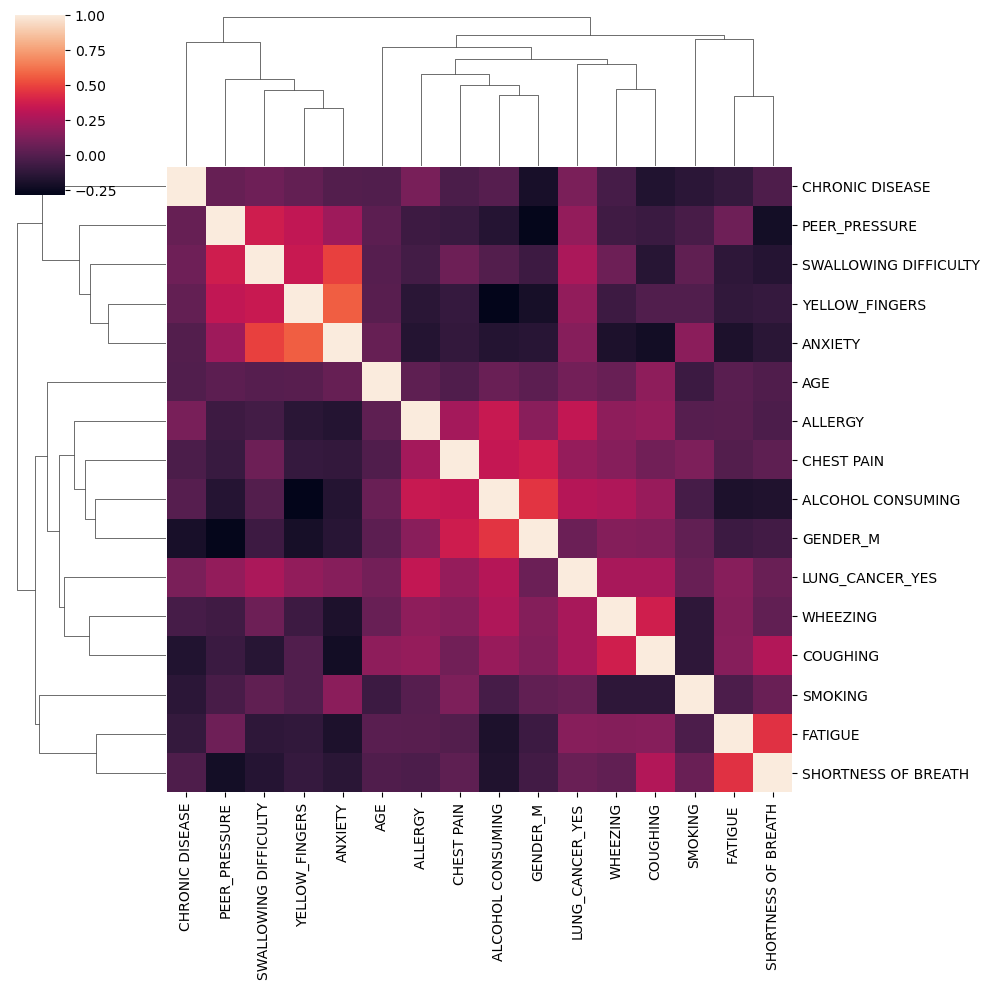

In [20]:
sns.clustermap(df.corr())

In [21]:
X = df.drop('LUNG_CANCER_YES', axis = 1)
y = df['LUNG_CANCER_YES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train[['AGE']])

MinMaxScaler()

In [25]:
X_train['AGE'] = scaler.transform(X_train[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])

In [27]:
m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [28]:
confusion_matrix(y_train, m.predict(X_train))

array([[ 21,  10],
       [  5, 195]])

In [29]:
print(classification_report(y_train, m.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        31
           1       0.95      0.97      0.96       200

    accuracy                           0.94       231
   macro avg       0.88      0.83      0.85       231
weighted avg       0.93      0.94      0.93       231



In [30]:
confusion_matrix(y_test, m.predict(X_test))

array([[ 5,  3],
       [ 2, 68]])

In [31]:
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.96      0.97      0.96        70

    accuracy                           0.94        78
   macro avg       0.84      0.80      0.82        78
weighted avg       0.93      0.94      0.93        78

